In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
os.getcwd()
os.chdir('E:/Project_files')

In [4]:
os.getcwd()

'E:\\Project_files'

Imported the three excel and merge them in one single file using merge

In [5]:
entertainer_basis = pd.read_excel('E:/Project_files/Entertainer_Basic_Info.xlsx', header= 0)
entertainer_basis.head()

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922


In [6]:
entertainer_last_work = pd.read_excel('E:/Project_files/Entertainer_Last_work_Info.xlsx', header= 0)
entertainer_last_work.head()

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN


In [7]:
entertainer_Breakthrough_Info = pd.read_excel('E:/Project_files/Entertainer_Breakthrough_Info.xlsx', header= 0)
entertainer_Breakthrough_Info.head()

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0


Found, how many rows and columns are there

In [8]:
entertainer_Breakthrough_Info.shape

(70, 4)

In [9]:
entertainer = pd.merge(entertainer_basis, entertainer_Breakthrough_Info, on='Entertainer', how='outer')
entertainer = pd.merge(entertainer, entertainer_last_work, on='Entertainer', how='outer')

In [10]:
entertainer.shape

(70, 8)

In [11]:
entertainer.head()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


Checked Duplicate values to maintain data integrity

In [12]:
entertainer.duplicated().sum()

0

Checked na values to maintain data quality

In [13]:
entertainer.isna().sum()

Entertainer                                      0
Gender (traditional)                             0
Birth Year                                       0
Year of Breakthrough/#1 Hit/Award Nomination     0
Breakthrough Name                                0
Year of First Oscar/Grammy/Emmy                  6
Year of Last Major Work (arguable)               0
Year of Death                                   40
dtype: int64

As you can see there are 40 nan values in year of death and 6 nan values in Year of first award

Check data types of all columns

In [14]:
entertainer.dtypes

Entertainer                                      object
Gender (traditional)                             object
Birth Year                                        int64
Year of Breakthrough/#1 Hit/Award Nomination      int64
Breakthrough Name                                object
Year of First Oscar/Grammy/Emmy                 float64
Year of Last Major Work (arguable)                int64
Year of Death                                   float64
dtype: object

Rename the columns to get better understanding

In [15]:
entertainer.rename(columns= {'Gender (traditional)' : 'Gender', 'Year of Breakthrough/#1 Hit/Award Nomination': 'Year of Hit Album',
                             'Breakthrough Name': 'Album name', 'Year of First Oscar/Grammy/Emmy':'Year of first award',
                             'Year of Last Major Work (arguable)':'Year of last work'}, inplace= True)

In [16]:
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album name,Year of first award,Year of last work,Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


Filled the na values with mode of the column as it is categorical data

In [17]:
entertainer['Year of first award'].fillna(entertainer['Year of first award'].mode()[0], inplace= True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11928\355046008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  entertainer['Year of first award'].fillna(entertainer['Year of first award'].mode()[0], inplace= True)


Plot the graph of 'Year of Death' columns to find which value occurs most

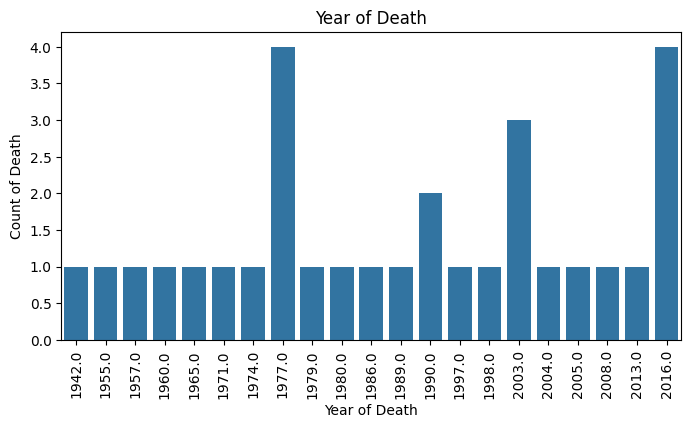

In [18]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = entertainer, x = 'Year of Death')
plt.title('Year of Death')
plt.xlabel('Year of Death')
plt.ylabel('Count of Death')
plt.xticks(rotation = 90)
plt.show()

In [19]:
entertainer['Year of Death'].fillna(entertainer['Year of Death'].mode()[1], inplace= True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11928\3544607460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  entertainer['Year of Death'].fillna(entertainer['Year of Death'].mode()[1], inplace= True)


As the first mode value is 1977 which is not possible for all the values that's why we use second most frequent value

We the get age column to find other information

In [20]:
entertainer['Age'] = entertainer['Year of Death'] - entertainer['Birth Year']

In [21]:
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album name,Year of first award,Year of last work,Year of Death,Age
0,Adele,F,1988,2008,19,2009.0,2016,2016.0,28.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,2016.0,41.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,2016.0,74.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0,81.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,2016.0,94.0


we will convert the float64 value to int64 to avoid decimal points.

In [22]:
entertainer['Year of first award'] = entertainer['Year of first award'].astype('int64')

In [23]:
entertainer['Year of Death'] = entertainer['Year of Death'].astype('int64')

In [24]:
entertainer.shape

(70, 9)

In [25]:
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album name,Year of first award,Year of last work,Year of Death,Age
0,Adele,F,1988,2008,19,2009,2016,2016,28.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999,2016,2016,41.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968,2014,2016,74.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935,1989,1989,81.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976,2016,2016,94.0


In [26]:
entertainer.isna().sum()

Entertainer            0
Gender                 0
Birth Year             0
Year of Hit Album      0
Album name             0
Year of first award    0
Year of last work      0
Year of Death          0
Age                    0
dtype: int64

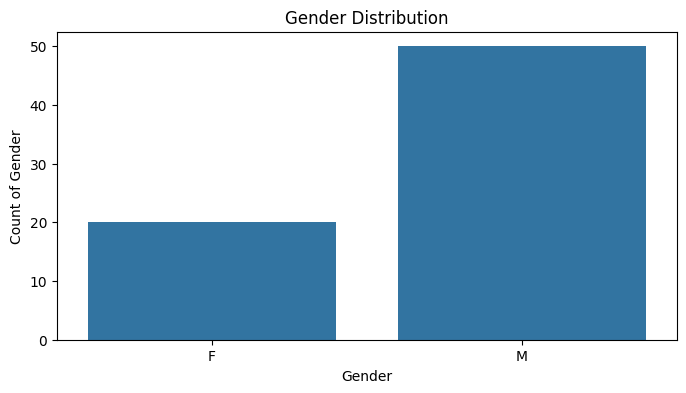

In [27]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = entertainer, x = 'Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.show()

Male entertainers are more than female entertainers

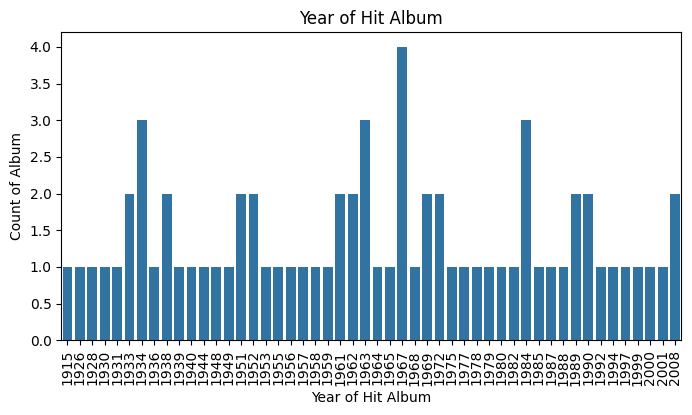

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data = entertainer, x = 'Year of Hit Album')
plt.title('Year of Hit Album')
plt.xlabel('Year of Hit Album')
plt.ylabel('Count of Album')
plt.xticks(rotation = 90)
plt.show()

As you can see, Most hit albums are in the year 1967 is '4' then 1984,1934 and 1963 with same values as '3' then so on.

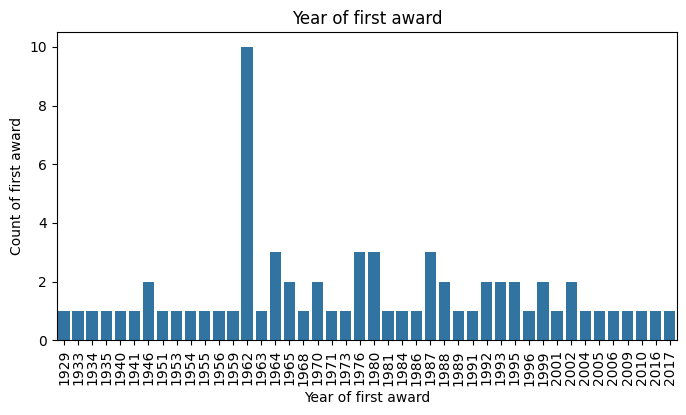

In [29]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = entertainer, x = 'Year of first award')
plt.title('Year of first award')
plt.xlabel('Year of first award')
plt.ylabel('Count of first award')
plt.xticks(rotation = 90)
plt.show()

As you can see many entertainers got their first award in 1962

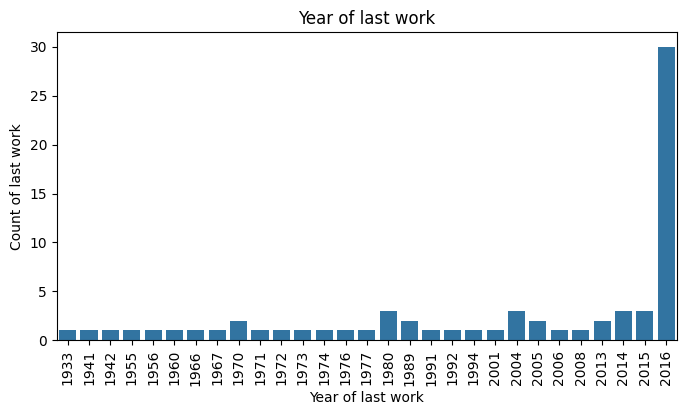

In [30]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = entertainer, x = 'Year of last work')
plt.title('Year of last work')
plt.xlabel('Year of last work')
plt.ylabel('Count of last work')
plt.xticks(rotation = 90)
plt.show()

There are many entertainers who did last work in 2016.

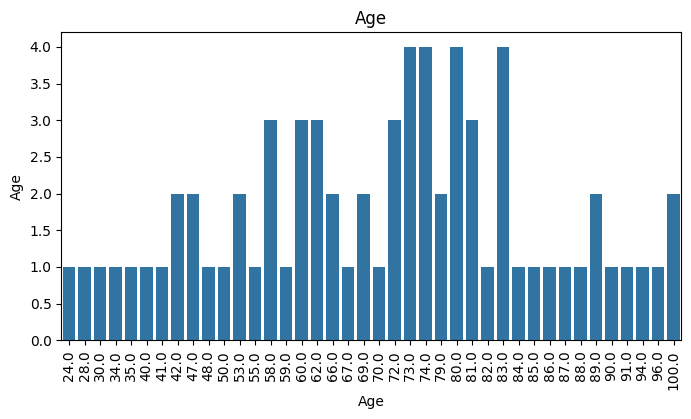

In [31]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = entertainer, x = 'Age')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()

As you can see there are many entertainers of age 73,74,80 and 83

Saved the file to visualize the data 

In [32]:
csv_file_path = 'E:\\Project_files\\entertainer.csv'
entertainer.to_csv(csv_file_path, index=False)